# **CASE STUDY-UNSUPERVISED LEARNING**

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# READING AND ANALYSIS THE DATA
data=pd.read_csv('/content/Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [28]:
data.shape

(440, 8)

In [29]:
#finding the NaN values
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

no NaN to handle

In [30]:
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

No categorical features, so no need for encoding

In [31]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [32]:
#finding the correlation between features
data.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


<Axes: >

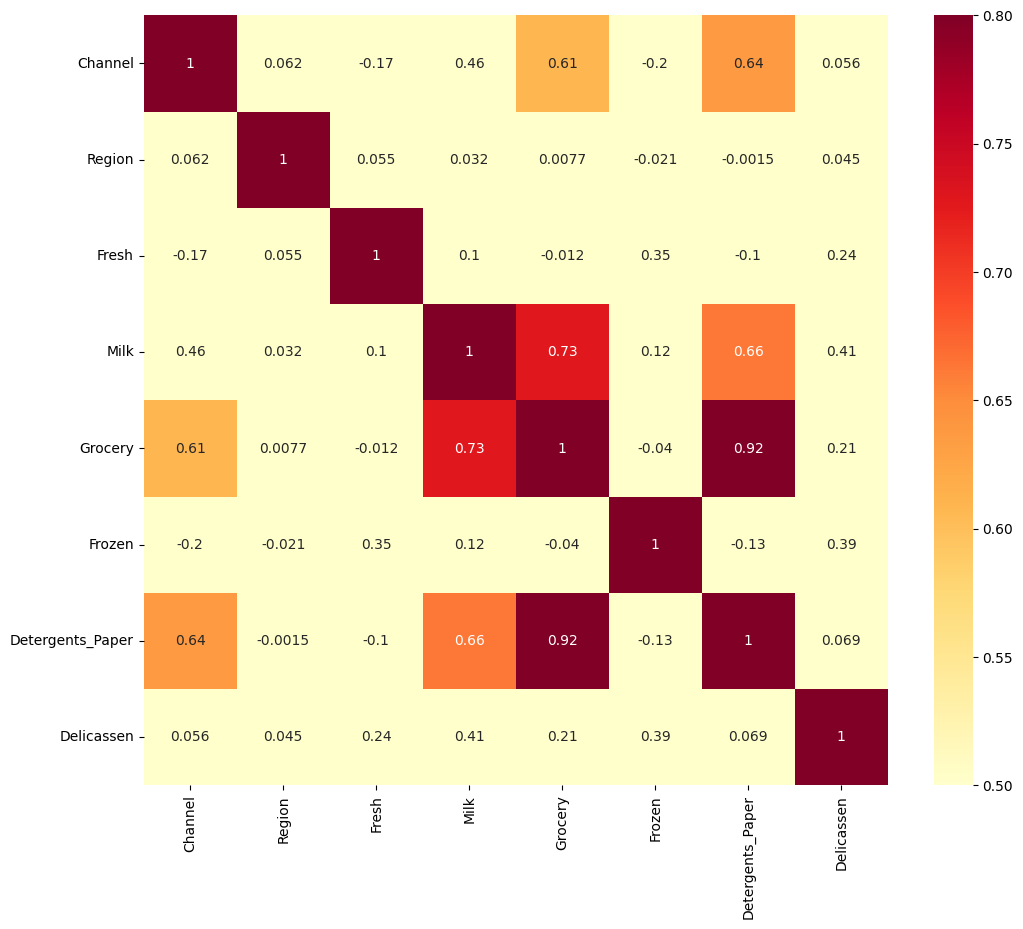

In [33]:
corrmatrix=data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corrmatrix,annot=True,vmin=0.5,vmax=0.8,cmap='YlOrRd')

In [34]:
data.Channel.unique()

array([2, 1])

In [35]:
data.Region.unique()

array([3, 1, 2])

In [36]:
# SCALLING
from sklearn.preprocessing import scale
scaledata = pd.DataFrame(scale(data),index=data.index,columns=data.columns)

<Axes: >

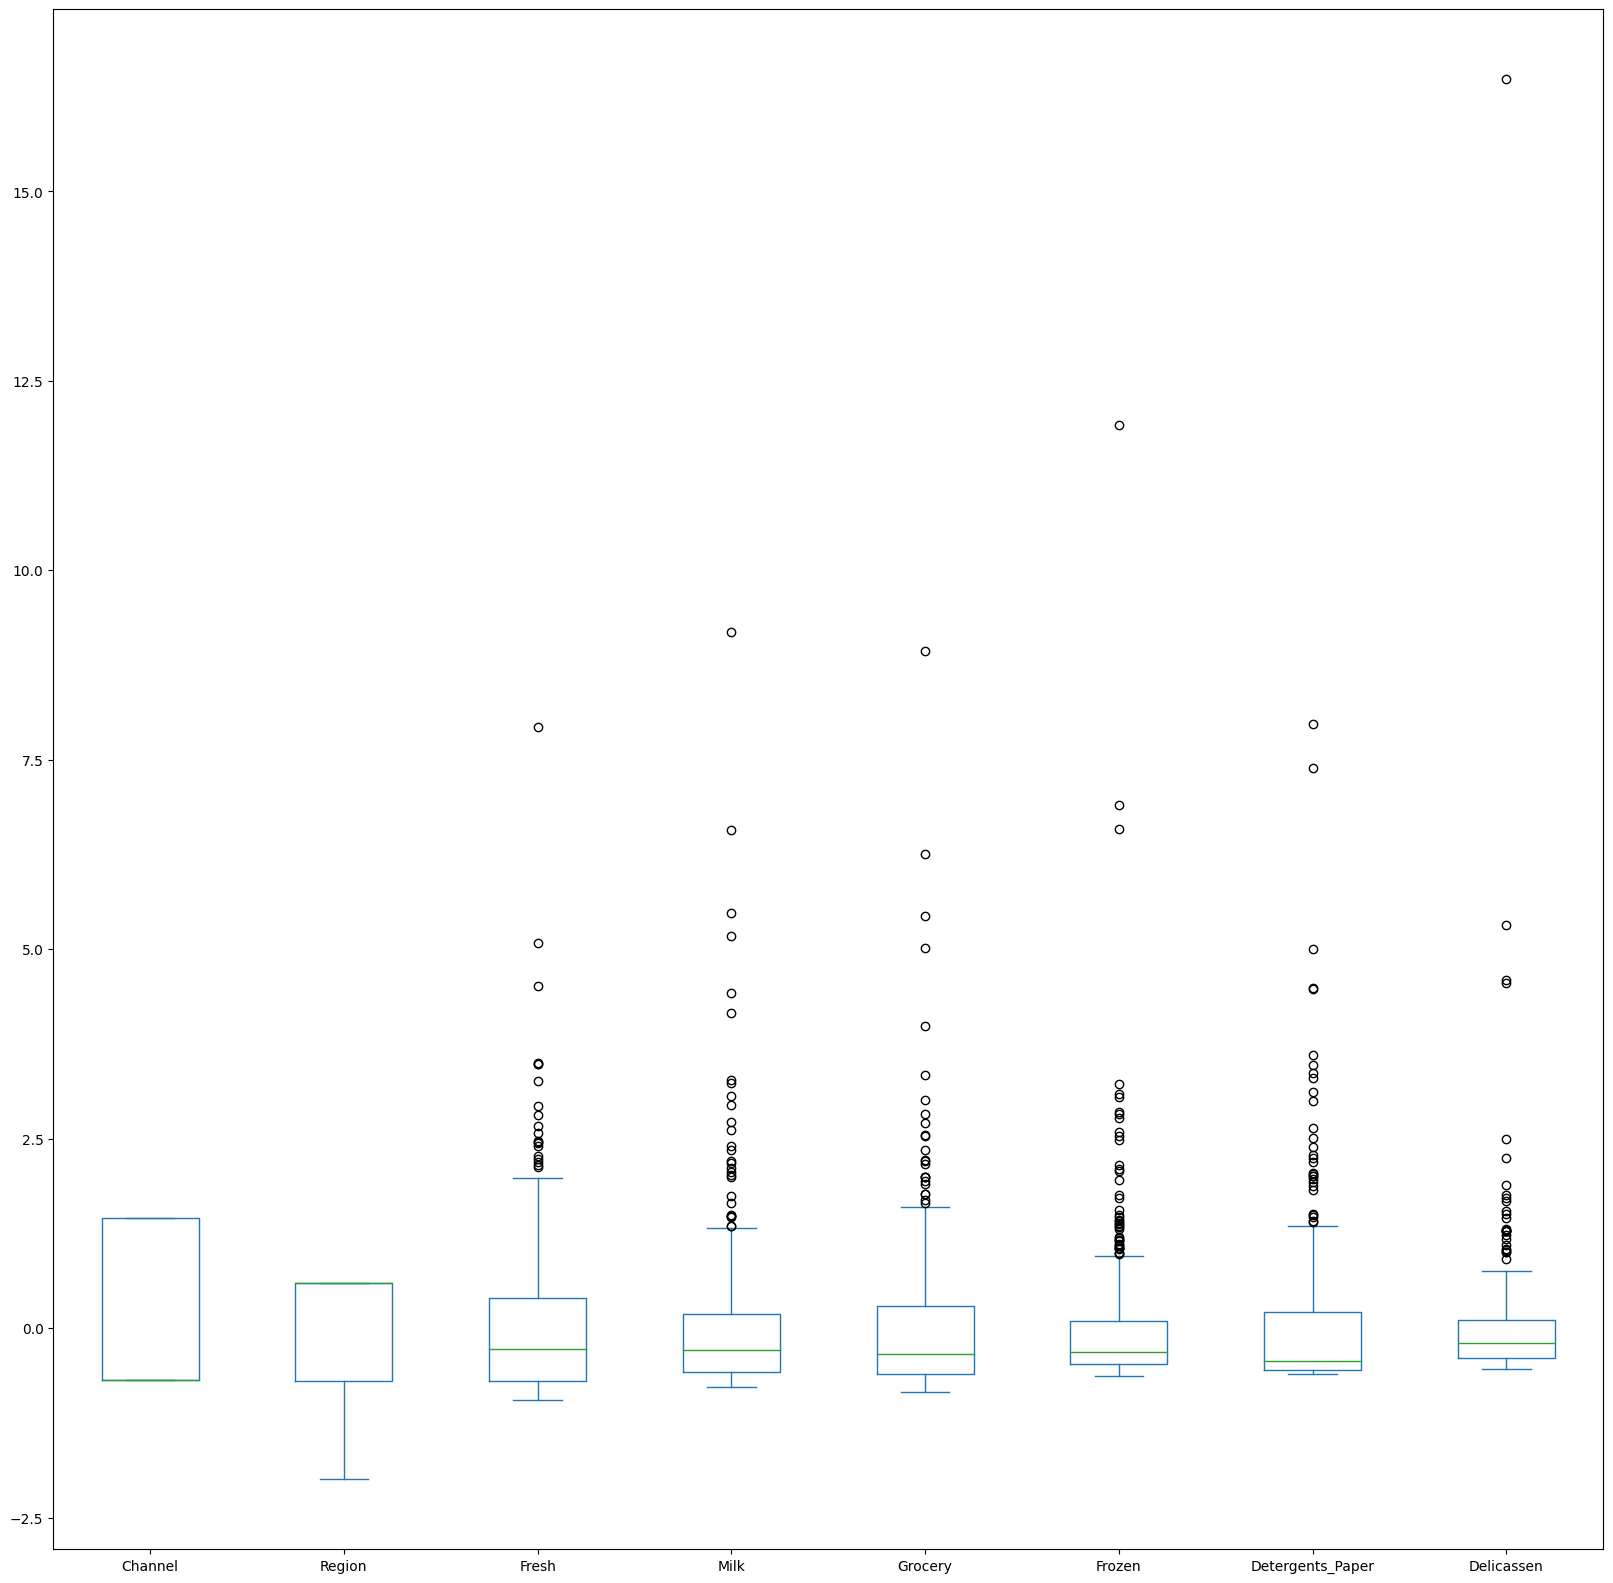

In [37]:
scaledata.plot(kind='box',figsize=(20,20))

K-MEANS CLUSTERING

In [38]:
from sklearn.cluster import KMeans

In [39]:
scaledata.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [40]:
x=scaledata[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']]

In [41]:
x.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [42]:
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,n_init=20)
  km.fit(x)
  css=km.inertia_
  wcss.append(css)

In [43]:
wcss

[2640.000000000001,
 1953.7882944315083,
 1619.952782172457,
 1312.5246032068285,
 1058.7712532570085,
 917.553133946421,
 823.3649499123181,
 744.168576706691,
 659.2973974659704,
 602.890084670853]

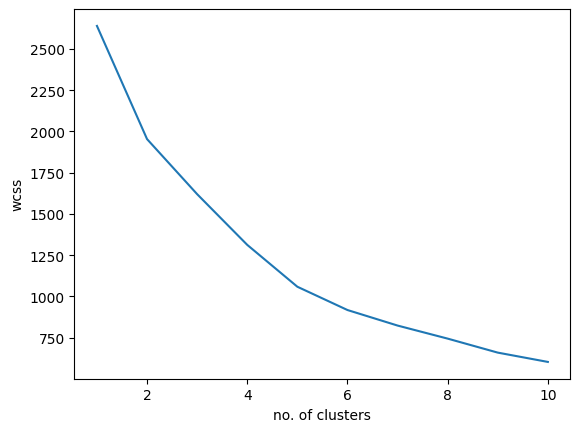

In [44]:
plt.plot(range(1,11),wcss)
plt.xlabel('no. of clusters')
plt.ylabel('wcss')
plt.show()

optimal no of clusters=5 by elbow method

In [45]:
x.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

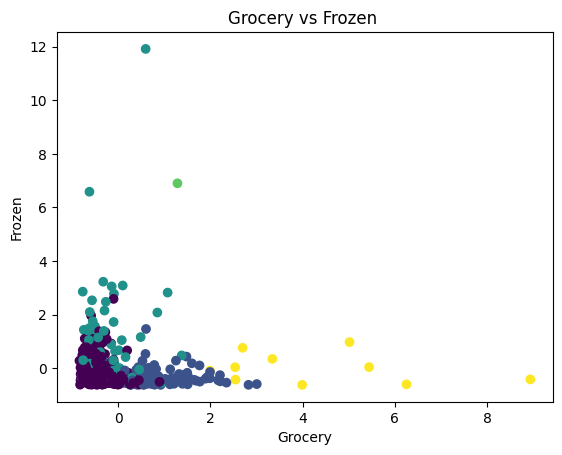

In [46]:
km=KMeans(n_clusters=5,n_init=20)
km.fit(x)
cluster_labels=km.predict(x)
pd.Series(cluster_labels).value_counts()
plt.scatter(x['Grocery'],x['Frozen'],c=cluster_labels)
plt.xlabel('Grocery')
plt.ylabel('Frozen')
plt.title('Grocery vs Frozen ')
plt.show()

HEIRARCHIAL CLUSTERING

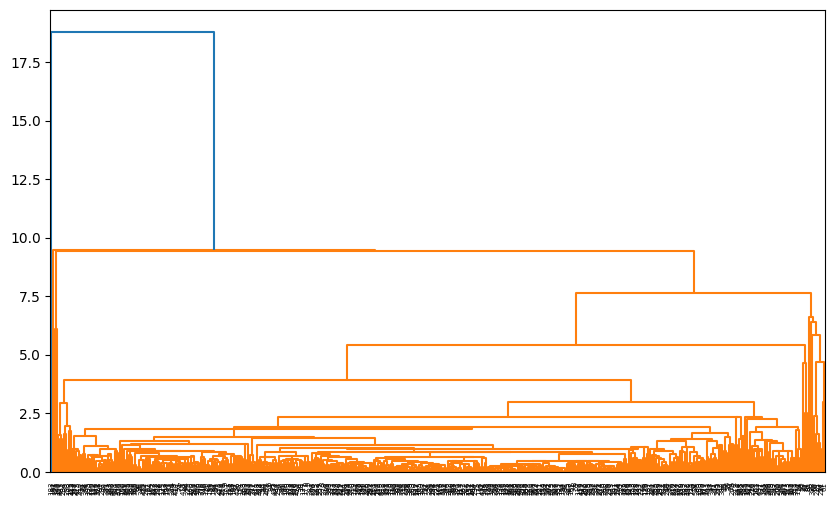

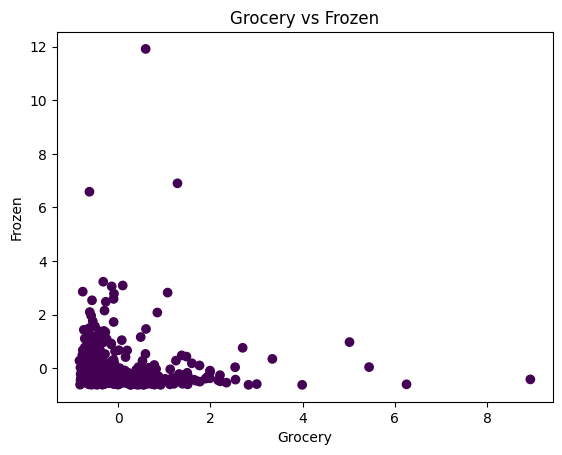

In [47]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
mergings = linkage(x,method="centroid")
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.show()
cluster_labels = fcluster(mergings,40,criterion="distance")
plt.scatter(x['Grocery'],x['Frozen'],c=cluster_labels)
plt.xlabel('Grocery')
plt.ylabel('Frozen')
plt.title('Grocery vs Frozen')
plt.show()

PCA

In [48]:
from sklearn.decomposition import PCA
pca=PCA()
pc_array=pca.fit_transform(x)
pc_array.shape

(440, 6)

In [49]:
pc_data1=pd.DataFrame(pc_array,columns=["pc1","pc2","pc3","pc4","pc5","pc6"])
pc_data1

,pc1,pc2,pc3,pc4,pc5,pc6
0,0.193291,-0.305100,-0.140878,-0.486432,0.495281,-0.007414
1,0.434420,-0.328413,0.319007,-0.178830,0.365579,0.054572
2,0.811143,0.815096,1.523416,-1.254082,-0.379054,-0.277539
3,-0.778648,0.652754,0.163012,0.380060,-0.276138,0.060718
4,0.166287,1.271434,0.066279,-0.826227,-0.394211,-0.026825
...,...,...,...,...,...,...
435,0.870602,2.220845,-0.605500,1.049263,0.423781,0.869495
436,-0.902520,1.676916,-1.418980,-0.572274,-0.257026,-0.226535
437,3.465704,-1.039838,-0.713161,0.033408,-0.538768,-0.085349
438,-0.918023,-0.030047,0.258408,-0.524578,-0.093215,-0.028943


In [50]:
pc_data1.corr().round(1)

,pc1,pc2,pc3,pc4,pc5,pc6
pc1,1.0,-0.0,-0.0,-0.0,-0.0,-0.0
pc2,-0.0,1.0,-0.0,0.0,-0.0,-0.0
pc3,-0.0,-0.0,1.0,0.0,-0.0,0.0
pc4,-0.0,0.0,0.0,1.0,-0.0,-0.0
pc5,-0.0,-0.0,-0.0,-0.0,1.0,-0.0
pc6,-0.0,-0.0,0.0,-0.0,-0.0,1.0


In [51]:
pca.explained_variance_

array([2.65099857, 1.70646229, 0.74175057, 0.56501435, 0.28632709,
       0.06311455])

In [52]:
pca.explained_variance_ratio_*100

array([44.08289288, 28.37639953, 12.3344129 ,  9.39550375,  4.7612724 ,
        1.04951854])

In [53]:
44.08289288+28.37639953+ 12.3344129+9.39550375+4.7612724+1.04951854

100.0